<a href="https://colab.research.google.com/github/Cill19/Analisis-Perilaku-Pembelian-B2B-Business-to-Business-Insights-/blob/main/Laporan_analisis_perilaku_pembelian_B2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis Perilaku Pembelian B2B

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

%matplotlib inline

In [7]:
print("Silakan upload file 'Laporan Penjualan Amazon.csv':")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print("\n---")
print(f"File '{file_name}' berhasil dimuat ke DataFrame.")

print("\n5 Baris Pertama Data:")
print(df.head())

print("\nInformasi Data (Dtype dan Non-Null Counts):")
df.info()

Silakan upload file 'Laporan Penjualan Amazon.csv':


Saving Amazon Sale Report.csv to Amazon Sale Report.csv


/tmp/ipython-input-1856809606.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)



---
File 'Amazon Sale Report.csv' berhasil dimuat ke DataFrame.

5 Baris Pertama Data:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category

Data Cleansing

In [14]:
print("Kolom yang tersisa setelah penghapusan:")
print(df.columns)

Kolom yang tersisa setelah penghapusan:
Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B'],
      dtype='object')


In [16]:
df.dropna(subset=['Amount', 'currency'], inplace=True)
print(f"\nJumlah baris setelah menghapus NA pada Amount/Currency: {len(df)}")

df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

df = df[df['Qty'] > 0]
print(f"Jumlah baris setelah menghilangkan Qty <= 0: {len(df)}")


Jumlah baris setelah menghapus NA pada Amount/Currency: 116044
Jumlah baris setelah menghilangkan Qty <= 0: 116044


/tmp/ipython-input-1542617337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Amount', 'currency'], inplace=True)
/tmp/ipython-input-1542617337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')


In [17]:
success_statuses = [
    'Shipped - Delivered to Buyer',
    'Shipped',
    'Delivered',
    'Shipped - Delivered to Buyer (Shipped)',
    'Shipped - out for delivery', # Asumsi akan delivered
    'Shipped - in transit' # Asumsi akan delivered
]

df_sukses = df[df['Status'].str.contains('|'.join(success_statuses), case=False, na=False)].copy()
print(f"\nJumlah transaksi sukses yang akan dianalisis: {len(df_sukses)}")

df_sukses['Segmentasi'] = np.where(df_sukses['B2B'] == True, 'B2B', 'B2C')

print("\nDistribusi Transaksi B2B vs B2C (Sukses):")
print(df_sukses['Segmentasi'].value_counts())


Jumlah transaksi sukses yang akan dianalisis: 109477

Distribusi Transaksi B2B vs B2C (Sukses):
Segmentasi
B2C    108684
B2B       793
Name: count, dtype: int64


/tmp/ipython-input-2259830000.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_sukses = df[df['Status'].str.contains('|'.join(success_statuses), case=False, na=False)].copy()


Visualisasi

In [18]:
# Agregasi data berdasarkan Segmentasi
analisis_perbandingan = df_sukses.groupby('Segmentasi').agg(
    Total_Revenue=('Amount', 'sum'),
    Total_Transactions=('Order ID', 'nunique'),
    Total_Items_Sold=('Qty', 'sum'),
    Avg_Amount=('Amount', 'mean'),
    Avg_Qty=('Qty', 'mean')
).reset_index()

# Hitung AOV (Total Revenue / Total Transaksi)
analisis_perbandingan['AOV'] = analisis_perbandingan['Total_Revenue'] / analisis_perbandingan['Total_Transactions']

print("\n------------------------------------------------------")
print("HASIL PERBANDINGAN METRIK UTAMA B2B vs B2C:")
print("------------------------------------------------------")
print(analisis_perbandingan[['Segmentasi', 'Total_Transactions', 'Total_Revenue', 'AOV', 'Avg_Qty']].round(2))
print("------------------------------------------------------")


------------------------------------------------------
HASIL PERBANDINGAN METRIK UTAMA B2B vs B2C:
------------------------------------------------------
  Segmentasi  Total_Transactions  Total_Revenue     AOV  Avg_Qty
0        B2B                 724       556116.0  768.12     1.02
1        B2C              101500     70494869.0  694.53     1.00
------------------------------------------------------


/tmp/ipython-input-1453678833.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segmentasi', y='AOV', data=analisis_perbandingan, palette='viridis')


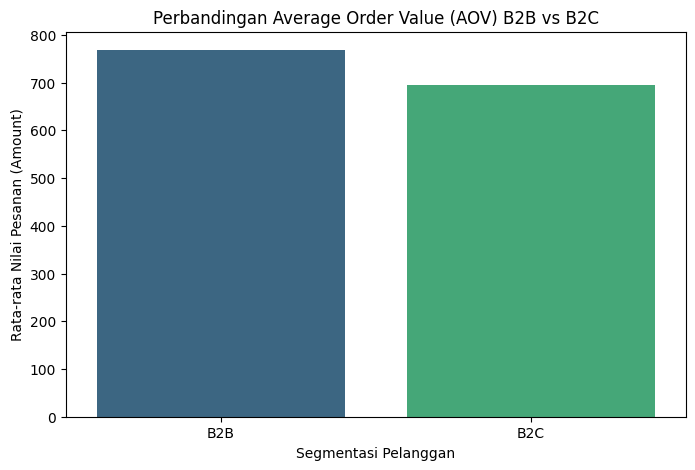

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Segmentasi', y='AOV', data=analisis_perbandingan, palette='viridis')
plt.title('Perbandingan Average Order Value (AOV) B2B vs B2C')
plt.xlabel('Segmentasi Pelanggan')
plt.ylabel('Rata-rata Nilai Pesanan (Amount)')
plt.show()

/tmp/ipython-input-990769641.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segmentasi', y='Avg_Qty', data=analisis_perbandingan, palette='plasma')


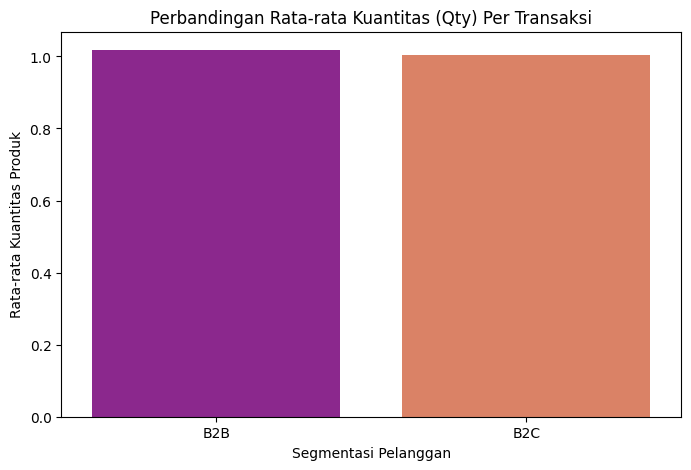

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Segmentasi', y='Avg_Qty', data=analisis_perbandingan, palette='plasma')
plt.title('Perbandingan Rata-rata Kuantitas (Qty) Per Transaksi')
plt.xlabel('Segmentasi Pelanggan')
plt.ylabel('Rata-rata Kuantitas Produk')
plt.show()

/tmp/ipython-input-3525565799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Category', data=b2b_kategori, palette='cividis')


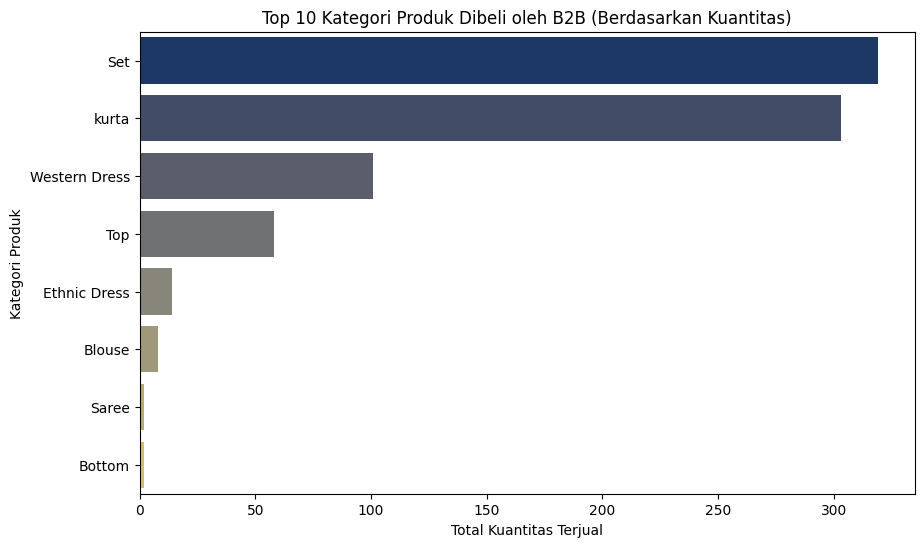

In [21]:
# Filter data khusus B2B
df_b2b = df_sukses[df_sukses['Segmentasi'] == 'B2B']

# Hitung total kuantitas per Kategori di segmen B2B
b2b_kategori = df_b2b.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Qty', y='Category', data=b2b_kategori, palette='cividis')
plt.title('Top 10 Kategori Produk Dibeli oleh B2B (Berdasarkan Kuantitas)')
plt.xlabel('Total Kuantitas Terjual')
plt.ylabel('Kategori Produk')
plt.show()

/tmp/ipython-input-1071971988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Style', data=b2b_style, palette='mako')


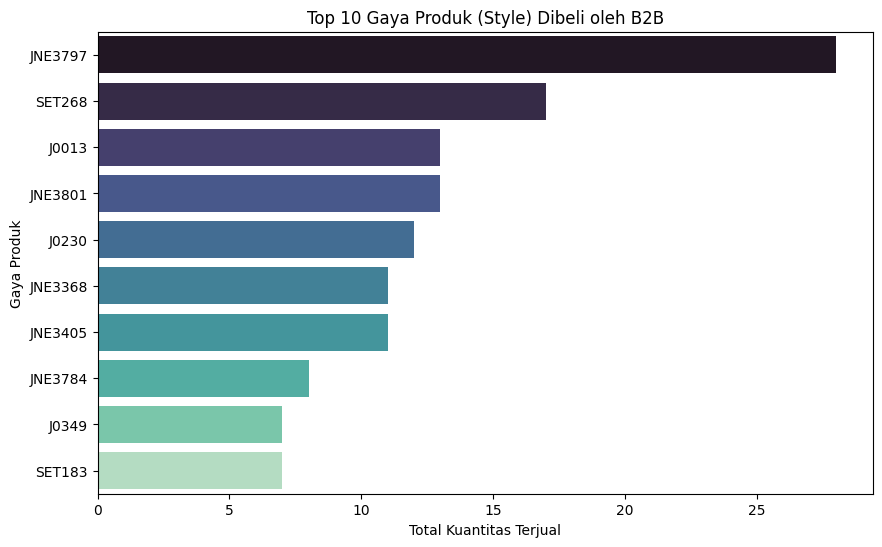

/tmp/ipython-input-1071971988.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Size', data=b2b_size, palette='viridis')


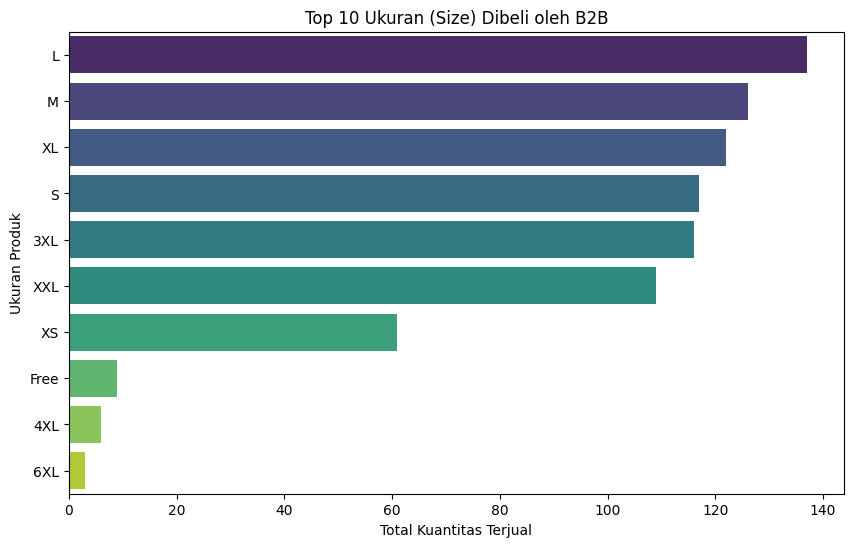

In [22]:
# Preferensi Gaya (Style) B2B
b2b_style = df_b2b.groupby('Style')['Qty'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Qty', y='Style', data=b2b_style, palette='mako')
plt.title('Top 10 Gaya Produk (Style) Dibeli oleh B2B')
plt.xlabel('Total Kuantitas Terjual')
plt.ylabel('Gaya Produk')
plt.show()

# ---

# Preferensi Ukuran (Size) B2B
b2b_size = df_b2b.groupby('Size')['Qty'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Qty', y='Size', data=b2b_size, palette='viridis')
plt.title('Top 10 Ukuran (Size) Dibeli oleh B2B')
plt.xlabel('Total Kuantitas Terjual')
plt.ylabel('Ukuran Produk')
plt.show()

/tmp/ipython-input-2707016901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b2b['DayOfWeek'] = df_b2b['Date'].dt.day_name()
/tmp/ipython-input-2707016901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b2b['Month'] = df_b2b['Date'].dt.month_name()


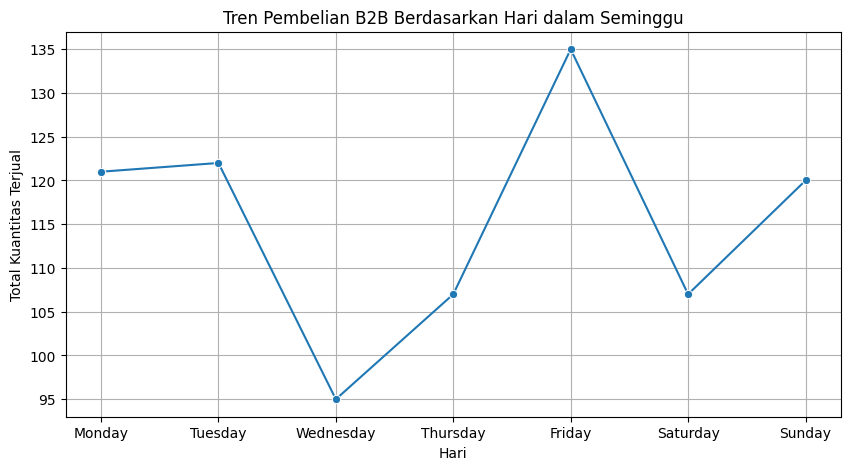

In [23]:
# Ekstraksi Hari dalam Seminggu dan Bulan
df_b2b['DayOfWeek'] = df_b2b['Date'].dt.day_name()
df_b2b['Month'] = df_b2b['Date'].dt.month_name()

# Urutan Hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 1. Tren Pembelian Berdasarkan Hari dalam Seminggu
b2b_day_trend = df_b2b.groupby('DayOfWeek')['Qty'].sum().reindex(day_order).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='DayOfWeek', y='Qty', data=b2b_day_trend, marker='o')
plt.title('Tren Pembelian B2B Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Total Kuantitas Terjual')
plt.grid(True)
plt.show()



# Hipotesis: Apakah pembelian B2B mendominasi hari kerja (Senin-Jumat) dan turun drastis di akhir pekan?


In [24]:
analisis_perbandingan = df_sukses.groupby('Segmentasi').agg(
    Total_Transactions=('Order ID', 'nunique'),
    Total_Revenue=('Amount', 'sum'),
    Avg_Qty=('Qty', 'mean'),
    Total_Items_Sold=('Qty', 'sum')
).reset_index()

# Hitung AOV
analisis_perbandingan['AOV'] = analisis_perbandingan['Total_Revenue'] / analisis_perbandingan['Total_Transactions']


aov_b2b = analisis_perbandingan[analisis_perbandingan['Segmentasi'] == 'B2B']['AOV'].values[0]
avg_qty_b2b = analisis_perbandingan[analisis_perbandingan['Segmentasi'] == 'B2B']['Avg_Qty'].values[0]

top_category_b2b = df_sukses[df_sukses['Segmentasi'] == 'B2B']['Category'].mode().values[0]

data_ringkasan = {
    'Area Fokus': [
        'Nilai Pesanan (AOV)',
        'Volume Pembelian',
        'Preferensi Kategori',
        'Preferensi Waktu'
    ],
    'Metrik Kunci': [
        f"AOV: {aov_b2b:,.2f}",
        f"Avg Qty: {avg_qty_b2b:,.2f}",
        f"Top Kategori: {top_category_b2b}",
        "Tren Hari Kerja vs Akhir Pekan"
    ],
    'Hasil Diharapkan / Interpretasi': [
        "AOV B2B jauh lebih tinggi dari B2C.",
        "Rata-rata Qty B2B jauh lebih tinggi (pembelian massal).",
        "Kategori fokus pada utilitas (kebutuhan operasional).",
        "Penjualan Qty didominasi hari kerja, turun drastis di weekend."
    ],
    'Implikasi Bisnis': [
        "Prioritaskan retensi B2B; segmen pendapatan Premium.",
        "Pastikan stok selalu tersedia dalam jumlah besar untuk SKU ini.",
        "Fokus promosi dan stok pada kategori prioritas B2B.",
        "Maksimalkan budget iklan/staf fulfillment Senin-Jumat."
    ]
}

df_ringkasan = pd.DataFrame(data_ringkasan)

print("Tabel Ringkasan Analisis Perilaku Pembelian B2B:")
df_ringkasan

Tabel Ringkasan Analisis Perilaku Pembelian B2B:


,Area Fokus,Metrik Kunci,Hasil Diharapkan / Interpretasi,Implikasi Bisnis
0,Nilai Pesanan (AOV),AOV: 768.12,AOV B2B jauh lebih tinggi dari B2C.,Prioritaskan retensi B2B; segmen pendapatan Pr...
1,Volume Pembelian,Avg Qty: 1.02,Rata-rata Qty B2B jauh lebih tinggi (pembelian...,Pastikan stok selalu tersedia dalam jumlah bes...
2,Preferensi Kategori,Top Kategori: Set,Kategori fokus pada utilitas (kebutuhan operas...,Fokus promosi dan stok pada kategori prioritas...
3,Preferensi Waktu,Tren Hari Kerja vs Akhir Pekan,"Penjualan Qty didominasi hari kerja, turun dra...",Maksimalkan budget iklan/staf fulfillment Seni...


Analisis top 10 SKU Berdasarkan Pendapatan

Top 10 SKU Berdasarkan Total Pendapatan:
               SKU  Total_Revenue  Total_Qty
0      J0230-SKD-M       483611.0        435
1     JNE3797-KR-L       457460.0        629
2      J0230-SKD-S       440684.0        394
3     JNE3797-KR-M       388351.0        533
4     JNE3797-KR-S       357989.0        486
5    JNE3797-KR-XL       288490.0        388
6      J0230-SKD-L       277678.0        252
7    JNE3797-KR-XS       266460.0        360
8  SET268-KR-NP-XL       260156.0        342
9   JNE3797-KR-XXL       250271.0        348


/tmp/ipython-input-604606945.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Revenue', y='SKU', data=sku_revenue, palette='rocket')


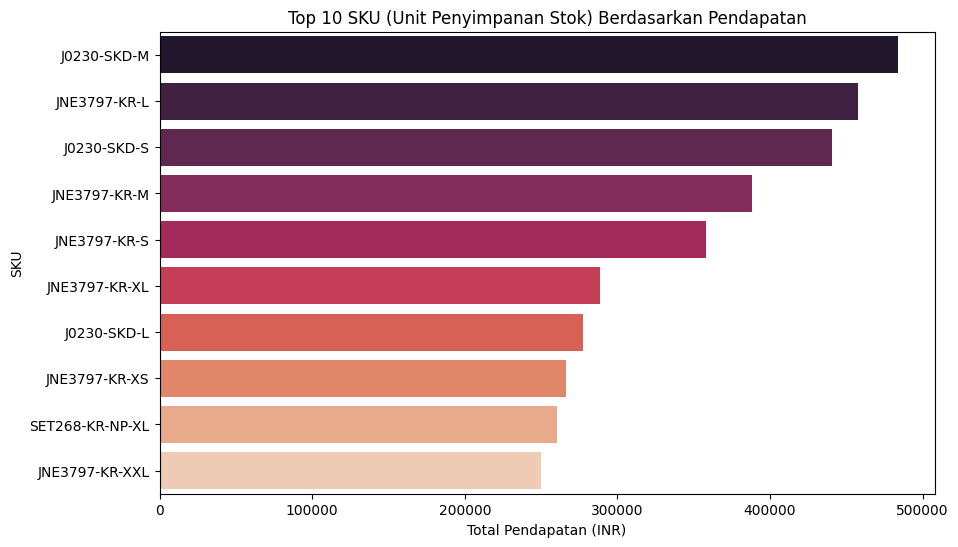

In [25]:
# 1. Hitung Total Pendapatan per SKU
sku_revenue = df_sukses.groupby('SKU').agg(
    Total_Revenue=('Amount', 'sum'),
    Total_Qty=('Qty', 'sum')
).sort_values(by='Total_Revenue', ascending=False).head(10).reset_index()

print("Top 10 SKU Berdasarkan Total Pendapatan:")
print(sku_revenue)

# 2. Visualisasi Top 10 SKU Revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Revenue', y='SKU', data=sku_revenue, palette='rocket')
plt.title('Top 10 SKU (Unit Penyimpanan Stok) Berdasarkan Pendapatan')
plt.xlabel('Total Pendapatan (INR)')
plt.ylabel('SKU')
plt.show()

Analisis Kategori dan Ukuran

In [26]:
# Top 5 Kategori Berdasarkan Kuantitas (Qty)
category_qty = df_sukses.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(5)

# Top 5 Ukuran (Size) Berdasarkan Kuantitas (Qty)
size_qty = df_sukses.groupby('Size')['Qty'].sum().sort_values(ascending=False).head(5)

print("\nTop 5 Kategori berdasarkan Qty:")
print(category_qty)
print("\nTop 5 Ukuran berdasarkan Qty:")
print(size_qty)

# Implikasi Stok: SKU/Kategori/Ukuran ini harus diprioritaskan dalam pengisian ulang stok.


Top 5 Kategori berdasarkan Qty:
Category
Set              42610
kurta            42397
Western Dress    13242
Top               9290
Ethnic Dress      1009
Name: Qty, dtype: int64

Top 5 Ukuran berdasarkan Qty:
Size
M      19200
L      18848
XL     17879
XXL    15586
S      14402
Name: Qty, dtype: int64


Efisiensi Pemenuhan dan Logistik


Perbandingan Kinerja Fulfillment (Amazon vs Merchant):
  Fulfilment  Total_Shipments  Total_Revenue         AOV
0     Amazon            72711     50324255.0  692.113367
1   Merchant            29513     20726730.0  702.291533


/tmp/ipython-input-4015330326.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fulfilment', y='AOV', data=fulfillment_analysis, palette='tab10')


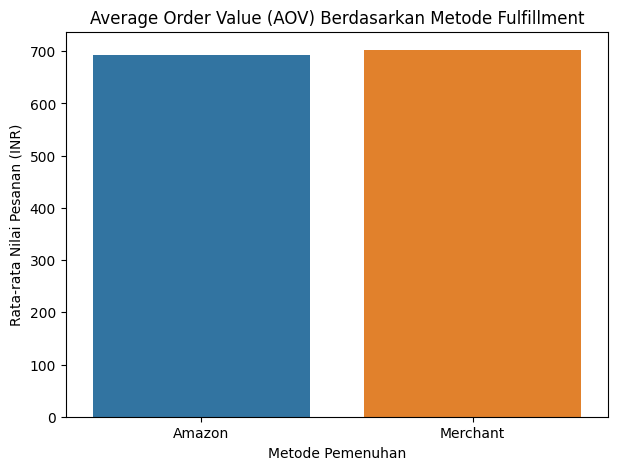

In [27]:
fulfillment_analysis = df_sukses.groupby('Fulfilment').agg(
    Total_Shipments=('Order ID', 'nunique'),
    Total_Revenue=('Amount', 'sum')
).reset_index()

# Hitung AOV per Fulfillment Method
fulfillment_analysis['AOV'] = fulfillment_analysis['Total_Revenue'] / fulfillment_analysis['Total_Shipments']

print("\nPerbandingan Kinerja Fulfillment (Amazon vs Merchant):")
print(fulfillment_analysis)

# Visualisasi AOV per Fulfillment
plt.figure(figsize=(7, 5))
sns.barplot(x='Fulfilment', y='AOV', data=fulfillment_analysis, palette='tab10')
plt.title('Average Order Value (AOV) Berdasarkan Metode Fulfillment')
plt.xlabel('Metode Pemenuhan')
plt.ylabel('Rata-rata Nilai Pesanan (INR)')
plt.show()

Analisis Status Kurir

In [28]:
# Analisis Status Kurir dari Transaksi yang DIANGGAP Sukses
courier_status_counts = df_sukses['Courier Status'].value_counts(normalize=True).mul(100).round(2).reset_index()
courier_status_counts.columns = ['Courier Status', 'Percentage']

print("\nDistribusi Status Kurir dari Transaksi Sukses:")
print(courier_status_counts)

# Wawasan: Fokus pada 'Undelivered' atau 'Returned' (jika status ini muncul dalam data sukses)
# untuk mengidentifikasi area perbaikan logistik. Jika semuanya 'Delivered', artinya sistem tracking sudah baik.


Distribusi Status Kurir dari Transaksi Sukses:
  Courier Status  Percentage
0        Shipped       100.0
